In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
%matplotlib notebook
NewTrainOne=[]
NewTrainTwo=[]
#NewTrainingData1=sorted(glob.glob(os.path.join("*.mat")))
#NewTrainingData2=glob.glob("Metal2/*.mat")
#NewTrainingData10=sorted(NewTrainingData1)

In [2]:
NewTrainingData1=[]
NewTrainingData2=[]
def key_func(x):
        return os.path.split(x)[-1]
for data_file1,data_file2 in zip(sorted(os.listdir("Metal1/"),key=key_func),sorted(os.listdir("Metal2/"),key=key_func)):
    NewTrainingData1.append(data_file1)
    NewTrainingData2.append(data_file2)
    print(data_file1)
   
    
#print(NewTrainingData1)


test01.mat
test02.mat
test03.mat
test04.mat
test05.mat
test06.mat
test07.mat
test08.mat
test09.mat
test10.mat
test11.mat
test12.mat
test13.mat
test14.mat
test15.mat
test16.mat
test17.mat
test18.mat
test19.mat
test20.mat
test21.mat
test22.mat
test23.mat
test24.mat
test25.mat


In [3]:
folderPath="C:/Users/Spandan Mishra/Documents/GitHub/LambWave/Metal1"

#os.path.join(folderPath,NewTrainingData1[0])
[NewTrainOne.append(loadmat(os.path.join(folderPath,f),squeeze_me=True, struct_as_record=False)) for f in NewTrainingData1]
[NewTrainTwo.append(loadmat(os.path.join(folderPath,f),squeeze_me=True, struct_as_record=False)) for f in NewTrainingData2]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
frequency=NewTrainOne[4]['setup'].signal_definition.frequency1
# sampling rate of the signal
sampling_rate=NewTrainOne[0]['setup'].sampling_rate

In [7]:
crosstalk=[]
frequency=[]
sampling_rate=[]
for signals in NewTrainOne:
    frequency.append(signals['setup'].signal_definition.frequency1)
    sampling_rate.append(signals['setup'].sampling_rate)
    crosstalk.append(5/(signals['setup'].signal_definition.frequency1)* (signals['setup'].sampling_rate))

In [9]:
for i in range(25):
    NewTrainOne[i]['s0'][1:int(crosstalk[i])]=0  #training data
    NewTrainTwo[i]['s0'][1:int(crosstalk[i])]=0  # test data
    
SensorData=list()
ActuatorData=list()

[SensorData.append(signal['s0']) for signal in NewTrainOne ]  # sensor data arranged in list
[ActuatorData.append(signal['a0']) for signal in NewTrainOne]  # Actuator data arrange in list
##############################################################################################################
TestSensorData=list()
TestActuatorData=list()

[TestSensorData.append(signal['s0']) for signal in NewTrainTwo ]  # Test data  for sensor  arranged in list
[TestActuatorData.append(signal['a0']) for signal in NewTrainTwo]  # test data for actuator  arrange in list
   
    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
TotalData=SensorData+TestSensorData
TotalData=np.asarray(TotalData)
#####################################
#####################################
from keras.layers import Input, Dense
from keras.models import Model
#from keras.optimizers import Adam
from keras import regularizers

np.random.seed(7)
SensorData=np.asarray(SensorData) # converting list into array (training data)
TestSensorData=  np.asarray(TestSensorData)
InputSignal=SensorData[0]
actual_signal_len=len(InputSignal)
encoding_dim=500 # This going to be size of our encoded representation
#this returns a tensor
inputs = Input(shape=(actual_signal_len,))
encoded=Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(inputs)
decoded=Dense(actual_signal_len)(encoded)

# this model maps an input to its encoded representation
encoder = Model(input=inputs, output=encoded)

## this model maps an input to its reconstruction
autoencoder= Model(input = inputs, output= decoded)
#we'll configure our model to use a mean squarred error loss, and the Adam optimizer
# we also train autoencoder for 50 epochs
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(TotalData, TotalData, epochs=100, batch_size=1)

#######################
#Encode the images
encoded_signal= encoder.predict(SensorData)
EncodedTestData= encoder.predict(TestSensorData)

Using TensorFlow backend.
c:\miniconda3\lib\site-packages\ipykernel\__main__.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
c:\miniconda3\lib\site-packages\ipykernel\__main__.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/100
50/50 [==============================] - 14s - loss: 33.5802    
Epoch 2/100
50/50 [==============================] - 8s - loss: 7.8205     
Epoch 3/100
50/50 [==============================] - 9s - loss: 3.5137     
Epoch 4/100
50/50 [==============================] - 9s - loss: 2.2234     
Epoch 5/100
50/50 [==============================] - 9s - loss: 2.0831     
Epoch 6/100
50/50 [==============================] - 9s - loss: 1.8545     
Epoch 7/100
50/50 [==============================] - 10s - loss: 1.3134    
Epoch 8/100
50/50 [==============================] - 10s - loss: 1.0896    
Epoch 9/100
50/50 [==============================] - 9s - loss: 0.9316     
Epoch 10/100
50/50 [==============================] - 12s - loss: 0.6245    
Epoch 11/100
50/50 [==============================] - 10s - loss: 0.8491    
Epoch 12/100
50/50 [==============================] - 10s - loss: 2.5073    
Epoch 13/100
50/50 [==============================] - 9s - loss: 1.4951     
Epoch 1

In [12]:
dist1=[]
dist2=[]
def mean(a):
    return sum(a)/len(a)
MeanBaseline=[]
MeanBaselineTest=[]
[MeanBaseline.append(i) for i in    map(mean,zip(*encoded_signal[0:4]))]
[MeanBaselineTest.append(i) for i in    map(mean,zip(*EncodedTestData[0:4]))]

for x,y in zip(encoded_signal,EncodedTestData):
    dist1.append(np.linalg.norm(MeanBaseline-x))
    dist2.append(np.linalg.norm(EncodedTestData[0]-y))

#    dist2.append(np.linalg.norm(EncodedTestData[0]-y))
print(dist1)
print(dist2)

[17.310817039765851, 10.014055072219834, 11.918686722914963, 14.245636758645661, 22.801814484026046, 103.84616433239211, 107.01695368360856, 107.47415247078402, 105.83491304947056, 102.77500007565462, 116.01207342627114, 123.58891583091255, 116.06127022769836, 114.49045564498633, 121.56048561110589, 129.00626483758967, 127.39080919228691, 129.28557650846386, 129.16302763298037, 133.98230423388219, 111.12742907250669, 117.54354361019104, 113.78996665105258, 118.01263267074117, 112.28601859237347]
[0.0, 11.572702, 28.909082, 31.207916, 40.027046, 111.55247, 114.6571, 114.7407, 113.13988, 110.64439, 123.96223, 132.16899, 125.43304, 123.5004, 130.40822, 138.49493, 137.05562, 139.41145, 139.11121, 144.53746, 124.67908, 131.27852, 127.39731, 131.6994, 126.08643]


In [22]:
SelectedDist=[]
SelectedDistTest=[]
index=[0,5,10,15]
[ SelectedDist.append(dist1[i]) for i in index]
[ SelectedDistTest.append(dist2[i]) for i in index]

[None, None, None, None]

In [27]:
from sklearn import linear_model
from math import log
from numpy import exp
gaps=[0.00001,0.1,0.2,0.3]
logGap=[]
[logGap.append(log(i))  for i in gaps]
SelectedDist=np.asarray(SelectedDist)
logGap=np.asarray(logGap)

expRegr=linear_model.LinearRegression(fit_intercept=True,normalize=True)
expRegr.fit(SelectedDist.reshape(4,1),logGap.reshape(4,1))
print("The regression coefficients are as:[%.7f, %.7f]" % (expRegr.intercept_ ,  expRegr.coef_))
TrainingGapsExp=expRegr.predict(np.asarray(SelectedDist).reshape(4,1))
exp(TrainingGapsExp)

The regression coefficients are as:[-13.0180913, 0.0967936]


array([[  1.18579243e-05],
       [  5.14861453e-02],
       [  1.67150638e-01],
       [  5.87955097e-01]])

<IPython.core.display.Javascript object>


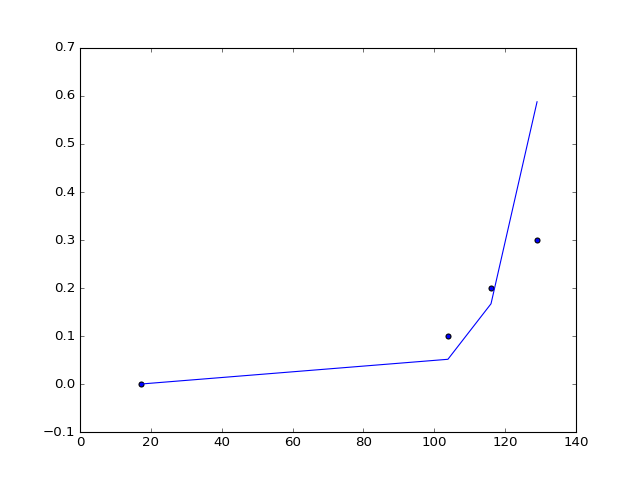

In [32]:
plt.figure()
plt.scatter(SelectedDist,gaps)
plt.plot(SelectedDist,exp(TrainingGapsExp))
plt.show()


It can be seen that exponential regression was used to fit between damage size and Damage Index. The above figure shows the prediction for the 